# Ciclo diesel real 

Este es un estudio para un ciclo diesel real, donde nos basamos en el motor 2.0 TDI de Volkswagen, pero se puede extrapolar para otros motores.
La libreria Thermal_process es creada por Victor Bernal y Oliver lira para simular ciclos termodinamicos.

In [1]:
import thermal_process as tp

Porcentaje eficiencia: 56.12%
Trabajo en el cilindro: -700.38J


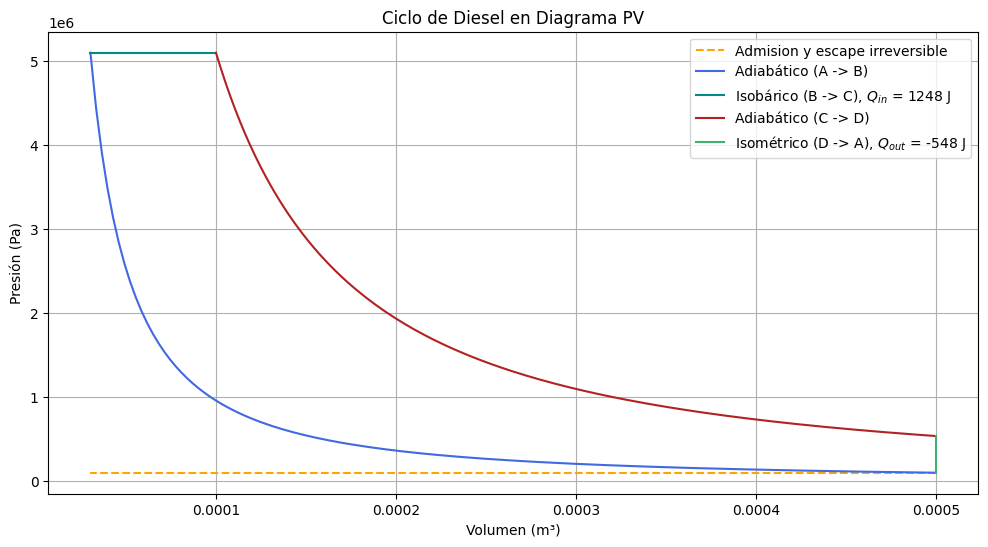

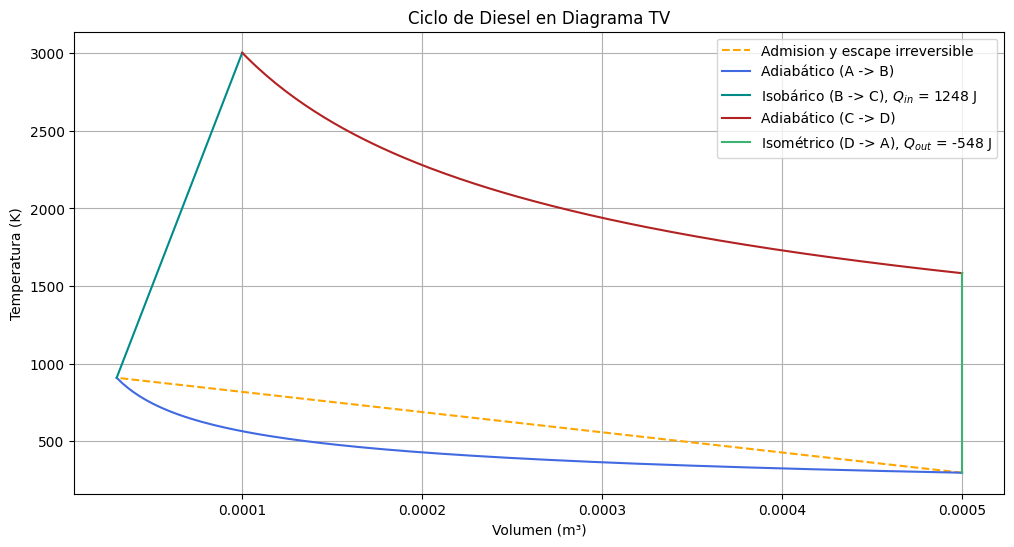

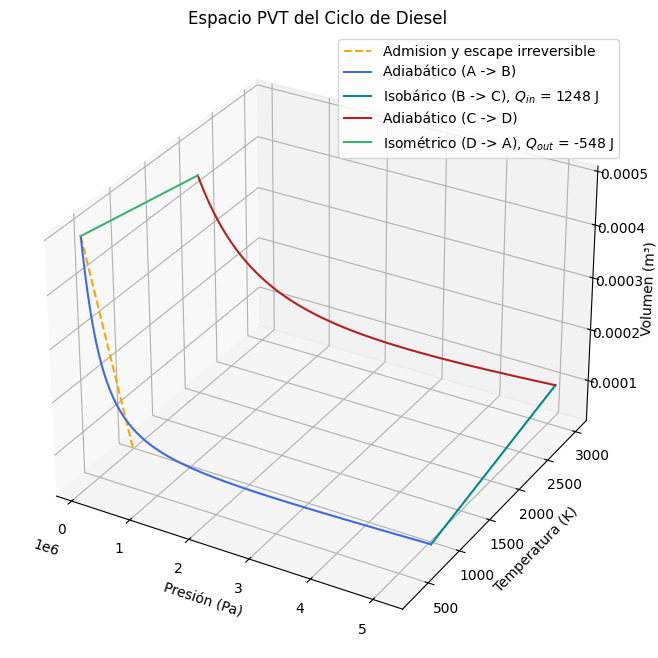

0

In [2]:
tp.diesel()